# QuadratiK Usage Examples

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(42)
import pandas as pd

## Normality Test

This section contains example for the Parametric Normality Test based on kernel-based quadratic distances

In [2]:
from QuadratiK.kernel_test import KernelTest

data = np.random.randn(100, 2)

normality_test = KernelTest(h=0.4, centering_type="param", random_state=42).test(data)
print(normality_test.summary())

Time taken for execution: 1.562 seconds
Test Results 
Kernel-based quadratic distance Normality test 
                                        U-Statistic    V-Statistic
------------------------------------  -------------  -------------
Test Statistic                             -1.16935       0.631518
Critical Value                              1.85334       8.80852
H0 is rejected (1 = True, 0 = False)        0             0
CV method: None 
Selected tuning parameter h : 0.4 

Summary Statistics 
           Feature 0    Feature 1
-------  -----------  -----------
Mean         -0.1156       0.034
Std Dev       0.8563       0.9989
Median       -0.0353       0.1323
IQR           1.0704       1.3333
Min          -2.6197      -1.9876
Max           1.8862       2.7202


### QQ Plot

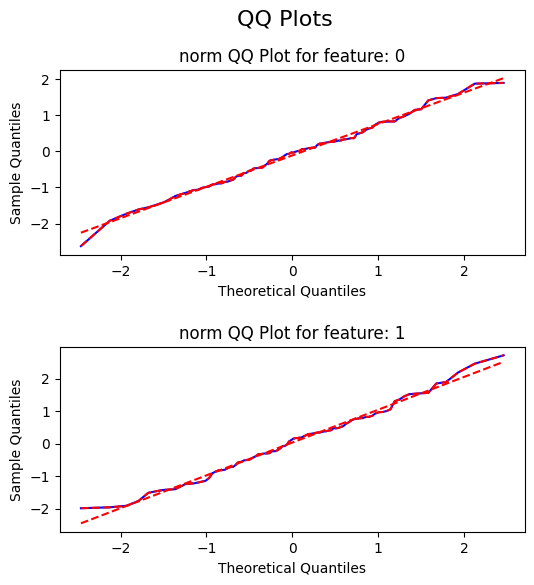

In [3]:
from QuadratiK.tools import qq_plot

qq_plot(data)

## Two Sample Test

This sections shows example for the two-sample test using normal kernel-based quadratic distance 

In [4]:
from QuadratiK.kernel_test import KernelTest

X = np.random.randn(100, 2)
Y = np.random.randn(100, 2)

two_sample_test = KernelTest(h=0.4, random_state=42).test(X, Y)
print(two_sample_test.summary())

Time taken for execution: 0.076 seconds
Test Results 
Kernel-based quadratic distance two-sample test 
                                            Dn     Trace
------------------------------------  --------  --------
Test Statistic                        0.363917  0.409149
Critical Value                        1.16209   1.30726
H0 is rejected (1 = True, 0 = False)  0         0
CV method: subsampling 
Selected tuning parameter h : 0.4 

Summary Statistics 
                            Group 1    Group 2    Overall
------------------------  ---------  ---------  ---------
('Feature 0', 'Mean')        0.1282    -0.045      0.0416
('Feature 0', 'Std Dev')     1.0396     1.025      1.0334
('Feature 0', 'Median')      0.1056     0.0118     0.0737
('Feature 0', 'IQR')         1.4912     1.2409     1.345
('Feature 0', 'Min')        -3.2413    -2.4716    -3.2413
('Feature 0', 'Max')         2.3147     3.0789     3.0789
('Feature 1', 'Mean')        0.0435    -0.1263    -0.0414
('Feature 1', 'Std 

## K-Sample Test

Shows examples for the kernel-based quadratic distance k-sample tests with the Normal kernel and bandwidth
parameter h.

In [5]:
from QuadratiK.kernel_test import KernelTest

X = np.random.randn(500, 4)
y = np.repeat(np.array([1, 2, 3, 4, 5]), 100)

k_sample_test = KernelTest(h=1.5, method="subsampling").test(X, y)
print(k_sample_test.summary())

Time taken for execution: 0.280 seconds
Test Results 
Kernel-based quadratic distance K-sample test 
                                            Dn     Trace
------------------------------------  --------  --------
Test Statistic                        -1.19987  -1.22849
Critical Value                         1.43268   1.46717
H0 is rejected (1 = True, 0 = False)   0         0
CV method: subsampling 
Selected tuning parameter h : 1.5 

Summary Statistics 
                            Group 1    Group 2    Group 3    Group 4    Group 5    Overall
------------------------  ---------  ---------  ---------  ---------  ---------  ---------
('Feature 0', 'Mean')       -0.016      0.1352     0.0391    -0.0453     0.001      0.0228
('Feature 0', 'Std Dev')     0.9033     1.0094     0.8065     1.0001     1.0049     0.9465
('Feature 0', 'Median')     -0.0216     0.0706     0.0854    -0.0767     0.0043     0.0217
('Feature 0', 'IQR')         1.1691     1.5099     1.0209     1.1796     1.35       1

## Poisson Kernel Test

Shows example for perforing the the kernel-based quadratic distance Goodness-of-fit tests for Uniformity for
spherical data using the Poisson kernel with concentration parameter rho.

In [6]:
from QuadratiK.tools import sample_hypersphere
from QuadratiK.poisson_kernel_test import PoissonKernelTest

X = sample_hypersphere(100, 3, random_state=42)

unif_test = PoissonKernelTest(rho=0.7, random_state=42).test(X)
print(unif_test.summary())

Time taken for execution: 0.036 seconds
Test Results 
Poisson Kernel-based quadratic distance test of Uniformity on the Sphere 
                                        U-Statistic    V-Statistic
------------------------------------  -------------  -------------
Test Statistic                              1.61567        22.8326
Critical Value                              1.99172        23.2295
H0 is rejected (1 = True, 0 = False)        0               0
Concentration parameter rho: 0.7

Summary Statistics 
           Feature 0    Feature 1    Feature 2
-------  -----------  -----------  -----------
Mean          0.0451      -0.1206       0.0309
Std Dev       0.509        0.5988       0.6122
Median        0.132       -0.1596       0.0879
IQR           0.8051       1.0063       1.1473
Min          -0.9548      -0.9929      -0.9904
Max           0.9772       0.9738       0.9996


### QQ Plot

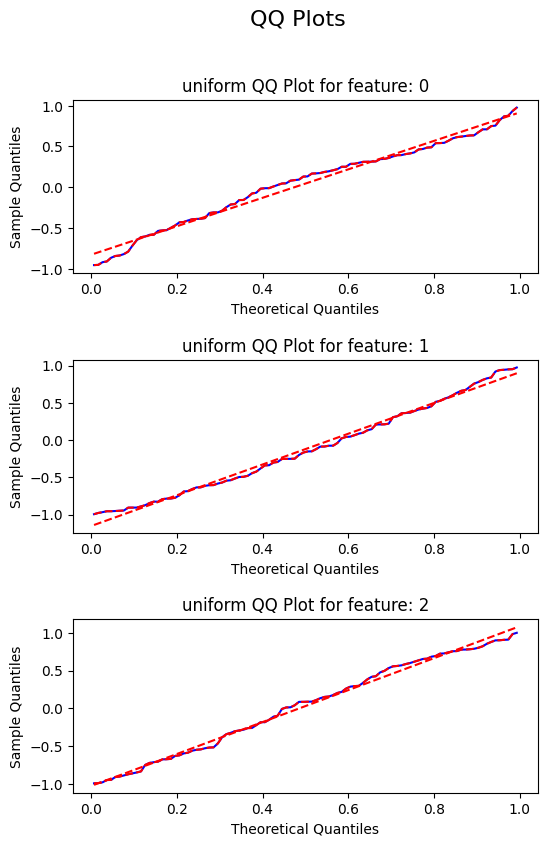

In [7]:
from QuadratiK.tools import qq_plot

qq_plot(X, dist="uniform")

## Poisson Kernel based Clustering

Shows example for performing the Poisson kernel-based clustering algorithm on the Sphere based on
the Poisson kernel-based densities.

In [8]:
from QuadratiK.datasets import load_wireless_data
from QuadratiK.spherical_clustering import PKBC
from sklearn.preprocessing import LabelEncoder

X, y = load_wireless_data(return_X_y=True)

le = LabelEncoder()
le.fit(y)
y = le.transform(y)

cluster_fit = PKBC(num_clust=range(2, 11), random_state=42).fit(X)
validation_df, elbow_plot = cluster_fit.validation(y)

print("Estimated mixing proportions :", cluster_fit.alpha_[4])
print("Estimated concentration parameters: ", cluster_fit.rho_[4])

/Users/raktimmukhopadhyay/miniforge3/envs/test1/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/raktimmukhopadhyay/miniforge3/envs/test1/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Estimated mixing proportions : [0.24977919 0.23590339 0.25654219 0.25777522]
Estimated concentration parameters:  [0.98348976 0.97773265 0.98572597 0.98226901]


In [9]:
validation_df

,2,3,4,5,6,7,8,9,10
Metrics,,,,,,,,,
ARI,0.310992,0.695260,0.940309,0.914087,0.878522,0.802916,0.731885,0.692697,0.597134
Macro Precision,0.313132,0.614824,0.977187,0.977110,0.976664,0.977205,0.973031,0.978007,0.972988
Macro Recall,0.496500,0.749000,0.977000,0.977000,0.976500,0.977000,0.972500,0.978000,0.973000
Average Silhouette Score,0.420666,0.353261,0.380309,0.302400,0.197795,0.133949,0.112560,0.081329,0.097386


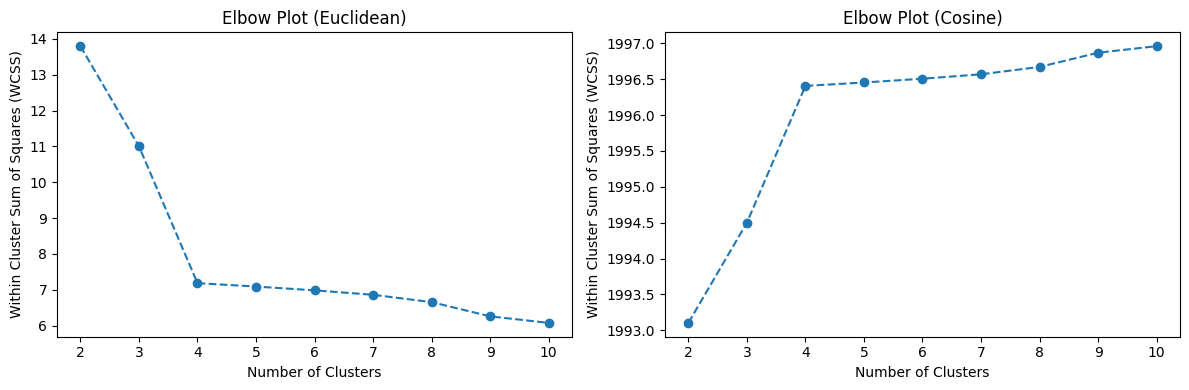

In [10]:
elbow_plot

In [11]:
print(cluster_fit.summary())

      Loglikelihood    Euclidean WCSS    Cosine WCSS  Num Data Point/Cluster                                                          Mixing Proportions (alpha)
--  ---------------  ----------------  -------------  ------------------------------------------------------------------------------  ---------------------------------------------------
 2          18954.2             13.8         1993.1   {0: 1458, 1: 542}                                                               [0.73 0.27]
 3          21249.9             11           1994.5   {0: 522, 1: 974, 2: 504}                                                        [0.27 0.47 0.25]
 4          22325.2              7.19        1996.41  {2: 504, 3: 510, 1: 486, 0: 500}                                                [0.25 0.24 0.26 0.26]
 5          22444.7              7.09        1996.45  {1: 507, 4: 460, 3: 487, 0: 46, 2: 500}                                         [0.03 0.26 0.25 0.24 0.23]
 6          22596.6              6.99  

## Density Estimation and Sample Generation from PKBD

In [12]:
from QuadratiK.spherical_clustering import PKBD

pkbd_data = PKBD().rpkb(10, [0.5, 0], 0.5, "rejvmf", random_state=42)
dens_val = PKBD().dpkb(pkbd_data, [0.5, 0.5], 0.5)
print(dens_val)

[0.46827108 0.05479605 0.21163936 0.06195099 0.39567698 0.40473724
 0.26561508 0.36791766 0.09324676 0.46847274]


## Tuning Parameter $h$ selection

Computes the kernel bandwidth of the Gaussian kernel for the two-sample and ksample
kernel-based quadratic distance (KBQD) tests.

In [13]:
from QuadratiK.kernel_test import select_h

X = np.random.randn(200, 2)
y = np.random.randint(0, 2, 200)

h_selected, all_values, power_plot = select_h(
    X, y, alternative="location", power_plot=True, random_state=None
)
print("Selected h is: ", h_selected)

Selected h is:  1.2


In [14]:
# shows the detailed power vs h table
all_values

,h,delta,power
0,0.4,0.2,0.04
1,0.8,0.2,0.18
2,1.2,0.2,0.32
3,1.6,0.2,0.24
4,2.0,0.2,0.32
5,2.4,0.2,0.48
6,2.8,0.2,0.22
7,3.2,0.2,0.46
0,0.4,0.3,0.20
1,0.8,0.3,0.44


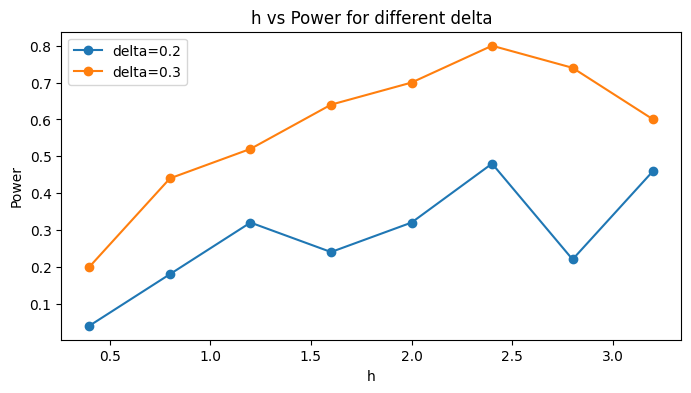

In [15]:
# shows the power plot
power_plot